In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:90%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:10pt;padding:5px;}
table.dataframe{font-size:10px;}
</style>
"""))

<b><font size="6" color="red">Ch 03. 비지도학습 - 군집화</font><b>

# 1. 데이터 생성
* 남/여 키와 몸무게 가상 데이터를 군집화

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
random.randint(140,195)

185

In [16]:
data = []
for i in range(50):
    # 여자 데이터 추가
    data.append([random.randint(40, 75), random.randint(145, 175)])
    # 남자 데이터 추가
    data.append([random.randint(60, 95), random.randint(160, 190)])
#data

In [17]:
# 분석 전 데이터 확인
# for female in data[::2]:
#     print(female, end=' ')
# print('female: ', [female for female in data[::2]])
# print('male: ', [male for male in data[1::2]])
print('= - = - = - = - = - = - = - = - = - = - =')
print('Female Weight(x): ', [female[0] for female in data[::2]])
print('Female Height(y): ', [female[1] for female in data[::2]])
print('Male Weight(x): ', [male[0] for male in data[1::2]])
print('Male Height(y): ', [male[1] for male in data[1::2]])

= - = - = - = - = - = - = - = - = - = - =
Female Weight(x):  [52, 60, 42, 59, 61, 66, 56, 40, 61, 50, 56, 59, 46, 60, 71, 56, 75, 56, 65, 46, 73, 40, 51, 55, 57, 66, 69, 74, 66, 61, 41, 64, 57, 43, 44, 66, 40, 47, 51, 57, 55, 60, 56, 59, 48, 68, 73, 52, 59, 70]
Female Height(y):  [167, 151, 173, 155, 173, 163, 166, 171, 148, 173, 167, 174, 164, 169, 153, 163, 148, 171, 175, 153, 165, 153, 150, 157, 159, 150, 175, 173, 159, 161, 158, 155, 157, 170, 153, 169, 174, 157, 146, 166, 149, 168, 156, 148, 174, 160, 161, 146, 163, 160]
Male Weight(x):  [94, 94, 73, 78, 76, 80, 69, 95, 65, 79, 60, 92, 61, 79, 72, 83, 80, 94, 72, 86, 63, 67, 75, 73, 81, 86, 79, 88, 89, 95, 75, 66, 91, 81, 76, 65, 93, 72, 65, 89, 60, 65, 62, 71, 62, 93, 92, 79, 71, 89]
Male Height(y):  [167, 186, 189, 187, 167, 170, 177, 169, 186, 186, 180, 190, 165, 180, 169, 175, 165, 176, 181, 187, 172, 178, 189, 171, 161, 167, 175, 160, 162, 190, 189, 179, 187, 189, 168, 168, 161, 171, 166, 175, 173, 189, 168, 173, 166, 160, 17

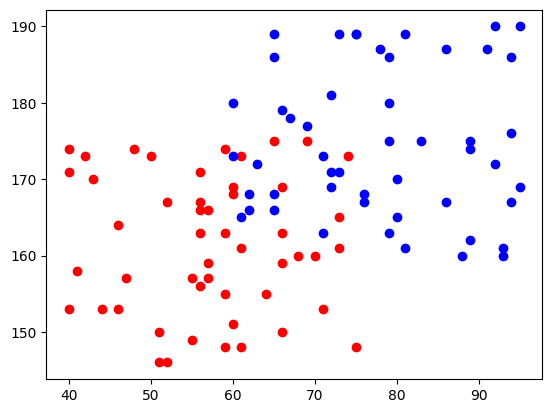

In [18]:
plt.plot([female[0] for female in data[::2]], [female[1] for female in data[::2]], 'o', color='r')
plt.plot([male[0] for male in data[1::2]], [male[1] for male in data[1::2]], 'o', color='b')
plt.show()

# 2. 군집화 로직

In [23]:
# 초기 랜덤 기준점 2개
random_points = [
    [random.randint(40,95), random.randint(145,190)],
    [random.randint(40,95), random.randint(145,190)],
]
random_points

[[61, 175], [92, 181]]

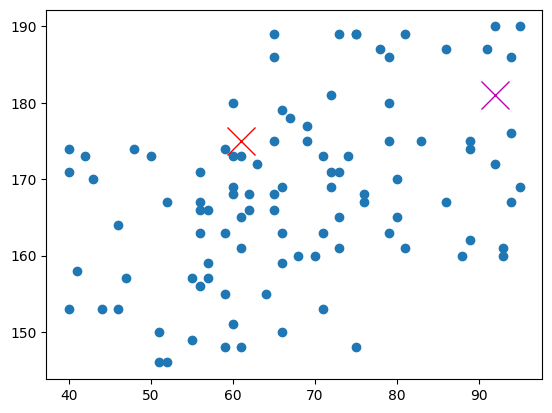

In [28]:
plt.plot([d[0] for d in data], [d[1] for d in data], 'o')
plt.plot(random_points[0][0], random_points[0][1], 'x', color='r', markersize=20) # 기준점 0
plt.plot(random_points[1][0], random_points[1][1], 'x', color='m', markersize=20) # 기준점 1

In [29]:
# 두 점 사이 거리를 return하는 함수
def dist(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
dist([0,0], [3,4])

5.0

In [30]:
# 기준점 0에 가까운 그룹과 기준점 1에 가까운 그룹을 분류
group0 = []
group1 = []
for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group0.append(d)
    else: 
        group1.append(d)
len(group0), len(group1)

(73, 27)

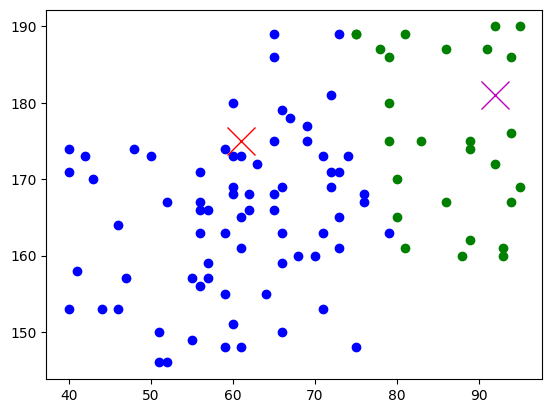

In [32]:
# group0과 group1, 기준점0과 기준점1 시각화
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', color='b') # 그룹0
plt.plot(random_points[0][0], random_points[0][1], 'x', color='r', markersize=20) # 기준점 0
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='g') # 그룹1
plt.plot(random_points[1][0], random_points[1][1], 'x', color='m', markersize=20) # 기준점 1
plt.show()

In [36]:
# 기준점 이동 - group0의 중심점 : 기준점0, group1의 중심점 : 기준점1
group0_meanX = np.mean([d[0] for d in group0])
group0_meanY = np.mean([d[1] for d in group0])
random_points[0] = [group0_meanX, group0_meanY]
group1_meanX = np.mean([d[0] for d in group1])
group1_meanY = np.mean([d[1] for d in group1])
random_points[1] = [group1_meanX, group1_meanY]
random_points

[[60.602739726027394, 165.08219178082192],
 [86.29629629629629, 175.88888888888889]]

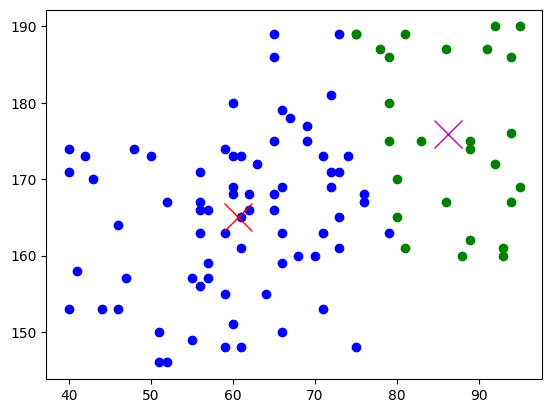

In [37]:
# 여기까지 한 사이클
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', color='b') # 그룹0
plt.plot(random_points[0][0], random_points[0][1], 'x', color='r', markersize=20) # 기준점 0
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='g') # 그룹1
plt.plot(random_points[1][0], random_points[1][1], 'x', color='m', markersize=20) # 기준점 1
plt.show()

# 3. 군집화 전체 코드 (for문 이용)
- 랜덤 포인트 2개 지정
- 최초 랜덤 포인트 2개  시각화(x)
- for문
    * 두 랜덤 포인트 기준으로 group0과 group1 분류
    * group0 중간점과 group1 중간점을 랜덤포인트로 업데이트
    * 랜덤 포인트 출력과 시각화

최초 기준점:  [[46, 180], [66, 153]]
1 번째 points:  [[60.241379310344826, 176.82758620689654], [70.52112676056338, 164.3943661971831]]
2 번째 points:  [[58.92307692307692, 173.48717948717947], [73.04918032786885, 164.49180327868854]]
3 번째 points:  [[57.02127659574468, 169.0212765957447], [76.86792452830188, 167.0943396226415]]
4 번째 points:  [[56.24528301886792, 164.41509433962264], [80.27659574468085, 172.04255319148936]]
5 번째 points:  [[56.471698113207545, 162.35849056603774], [80.02127659574468, 174.36170212765958]]
6 번째 points:  [[56.660377358490564, 161.8490566037736], [79.80851063829788, 174.93617021276594]]
7 번째 points:  [[56.925925925925924, 161.87037037037038], [80.0, 175.19565217391303]]
8 번째 points:  [[56.925925925925924, 161.87037037037038], [80.0, 175.19565217391303]]
9 번째 points:  [[56.925925925925924, 161.87037037037038], [80.0, 175.19565217391303]]


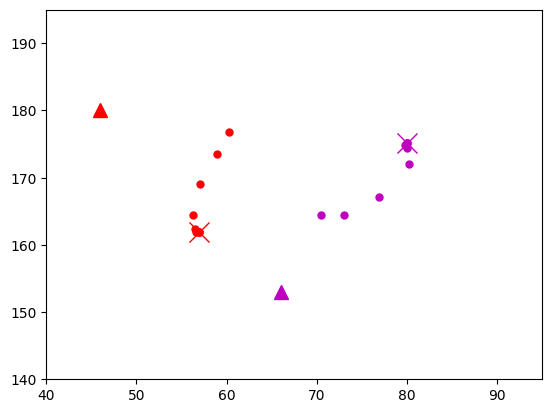

In [51]:
points = [ #최초 랜덤 포인트
    [random.randint(40,95), random.randint(145,190)], #기준점0
    [random.randint(40,95), random.randint(145,190)], #기준점1
]
print('최초 기준점: ', points)
plt.plot(points[0][0], points[0][1], '^', color='r', markersize=10) # 최초 기준점 0 마킹
plt.plot(points[1][0], points[1][1], '^', color='m', markersize=10) # 최초 기준점 1 마킹
for i in range(1,10):
    # 두 포인트 기준으로 group0과 group1 분류
    group0 = [] #그룹 초기화
    group1 = []
    for d in data:
        if dist(d, points[0]) < dist(d, points[1]):
            group0.append(d)
        else:
            group1.append(d)
    # group0의 중간점, group1의 중간점으로 points Update
    group0_meanX = np.mean([d[0] for d in group0])
    group0_meanY = np.mean([d[1] for d in group0])
    points[0] = [group0_meanX, group0_meanY] # new 기준점0
    group1_meanX = np.mean([d[0] for d in group1])
    group1_meanY = np.mean([d[1] for d in group1])
    points[1] = [group1_meanX, group1_meanY] # new 기준점1
    # new 랜덤 포인트 출력
    print(i, '번째 points: ', points)
    plt.plot(points[0][0], points[0][1], 'o', color='r', markersize=5) # 기준점 0
    plt.plot(points[1][0], points[1][1], 'o', color='m', markersize=5) # 기준점 1
plt.plot(points[0][0], points[0][1], 'x', color='r', markersize=15) # 최좀 기준점 0
plt.plot(points[1][0], points[1][1], 'x', color='m', markersize=15) # 최종 기준점 1
plt.xlim([40,95])
plt.ylim([140,195])
plt.show()

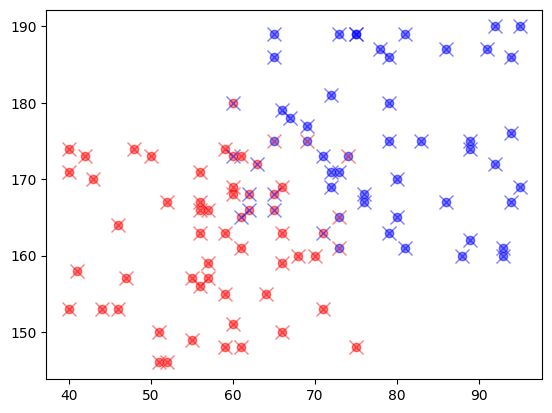

In [53]:
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', color='r', alpha=0.5)
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='b', alpha=0.5)
plt.plot([d[0] for d in data[::2]], [d[1] for d in data[::2]], 'x', color='r', alpha=0.5, markersize=10)
plt.plot([d[0] for d in data[1::2]], [d[1] for d in data[1::2]], 'x', color='b', alpha=0.5, markersize=10)

# 4. api(sklearn)를 이용한 군집화
- sklearn : 머신러닝 패키지
    - 예측모델 : 분류, 회귀, 군집분석 - fit(학습), predict(예측)
    - 변환모델 : 전처리 시 사용 ex. 스케일 조정 - fit(학습), transform(변환함수), fit_transform(학→변)

In [55]:
from sklearn.cluster import KMeans

In [ ]:
# 군집분석 라이브러리가 경고메시지 출력할 경우
# import os
# os.environ['OMP_NUM_THREDS']='1'

In [61]:
# 데이터 2차원 list → numpy array
data = np.array(data)

In [62]:
model = KMeans(n_clusters = 2, # 2개 그룹으로 군집
               init = 'random', # 초기 기준점을 random하게
               # init = 'k-means++' (default, 추천 - 초기 중심점들이 서로 멀리 떨어지도록 배치해 분석 효율 개선) 
               n_init = 10, # 10회 실행
               random_state=7) # random 결과를 일관적으로 맞추기 위한 seed (재현성 확보)
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [63]:
# 기준점(중심점)
model.cluster_centers_

array([[ 80.5       , 175.52272727],
       [ 57.35714286, 162.08928571]])

In [64]:
# 나눠진 그룹들의 인덱스
model.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [66]:
group0 = data[model.labels_==0]
group1 = data[model.labels_==1]

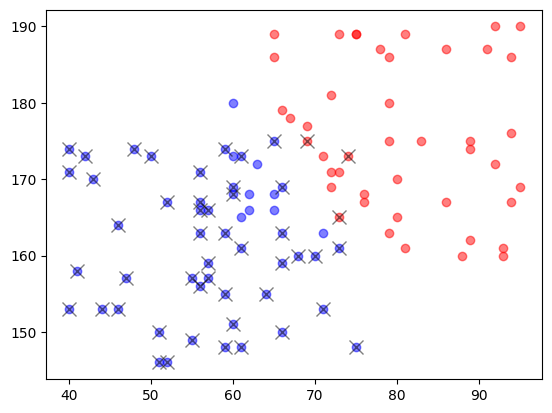

In [67]:
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', color='r', alpha=0.5)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='b', alpha=0.5)
plt.plot([d[0] for d in data[::2]],
         [d[1] for d in data[::2]], 'x', color='k', alpha=0.5, markersize=10)